# IBM Certified Associate Developer - Quantum Computation using Qiskit v0.2X Preparatory Guide

This is a guide designed to assist you with preparing for the IBM Quantum Computation Developer Exam. There will be multiple sections within this guide that focuses on different parts of the exam as well as multiple sub-sections within these sections. Each sub-section will contain some sample qiskit code that can be used to address the task assigned within that sub-section. **For some of the sub-sections, the qiskit code provided is not sufficient enough to be ready to tackle that sub-section. Hence, it is advisable to also consult the link provided within that sub-section.** Before we dive deeper into each section, I would like to highlight that each section/sub-section follows the same syntax as the one found on the IBM official quantum certification page [here](https://www.ibm.com/training/certification/C0010300). The logic behind this approach is to allow prospective test-takers to easily find solutions to corresponding sub-sections from that website, while preparing for the exam. Hence, when test-takers struggle with a sub-section on the certification page, they can easily find that section on here. It would also be advisable for test-takers to be familiar with the basics of quantum computing as well as linear algebra before going through this study guide. Below are some resources that can help test-takers develop a great knowledge of quantum computing:
- [Voucher](https://airtable.com/shrEZlRker8zUukUf): This is a link to a voucher that you can use to register for the exam for free.
- [Linear Algebra](https://learn.qiskit.org/course/ch-appendix/an-introduction-to-linear-algebra-for-quantum-computing): This is a great resource to brush up your knowledge of linear algebra.
- [Matrix Multiplication](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/v/matrix-multiplication-intro): Matrix Multiplication is one of the key ingredients for understanding quantum gate operations in quantum computing. Hence, this resource is a great tool for understanding matrix multiplication.
- [Qiskit Textbook](https://qiskit.org/textbook/preface.html): The first two chapters of this course could serve as a starting point for prospective test takers to learn the basics of quantum computing
- [The Ultimate Guide to a Quantum Computing Certification with Qiskit](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/): This is another great resource for getting ready for the quantum computing exam. Once you have gone through the first two chapters of the Qiskit Textbook, my advice for you will be to go through this website.
- [Qiskit Pocket Guide](https://github.com/qiskit-community/qiskit-pocket-guide): Qiskit Pocket Guide is a fascinating manual for diving deeper into how Qiskit works. Thankfully, the hyperlinked github repo contains code for the important sections needed in the exam. The book can also be found on O'reilly via this [link](https://www.oreilly.com/library/view/qiskit-pocket-guide/9781098112462/). You can also purchase it from Amazon [here](https://www.amazon.com/Qiskit-Pocket-Guide-James-Weaver-ebook/dp/B0B459FVHF)

**Note: It is advisable to re-run the codes you find on any of the resources above on a Jupyter Notebook file. Do not just copy and paste, try to type in the code from scratch. It will assist you with remembering the coding syntax prior to taking the exam, and becoming more fluent at developing your own quantum circuits via Qiskit with ease.**

**Extra Note: At the end of this document, there is a section called documentation. This section provides information about different documentations that dive deeper into how to address the tasks within each section**

### Package Installation

Below are the packages/modules that will be useful for conducting numerous qiskit operations
- The BasicAer & Aer functions are used to connect your circuit to a simulator for experimentation
- The QuantumRegister and ClassicalRegister functions are used to set the number of qubits and bits respectively
- The QuantumCircuit function is used to instantiate the number of qubits and bits in a quantum circuit
- The IBMQ function can be used to connect with backends from various IBM quantum hubs around the world.
- All the functions under qiskit.visualization are used to visualize the statevector of the qubit or visualize the experimental results from running the quantum circuit.
- The qiskit.tools.jupyter tool allows you to utilize more advanced qiskit resources for monitoring experiments et al.

In [1]:
from qiskit import BasicAer, Aer, execute, QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city, array_to_latex, plot_histogram
from qiskit.tools.jupyter import *
import numpy as np

## Section 1 - Performing Operations on Quantum Circuits

### Construct multi-qubit quantum registers

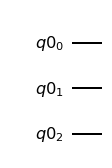

In [2]:
# To construct a multi-qubit quantum register you need to consult the QuantumRegister function and pass the number of qubits 
# you want
qr = QuantumRegister(3) # Using three qubits
qc = QuantumCircuit(qr)
qc.draw("mpl")
# Below is an image showing you a 3-qubit quantum register

### Measure quantum circuits in classical registers

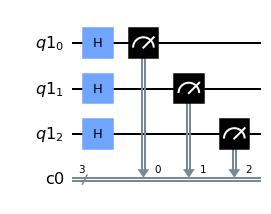

In [3]:
# In order to measure quantum circuits in classical registers, we shall need to use the Classical Register function 
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.h([0,1,2])
qc.measure([0,1,2], [0,1,2])
qc.draw("mpl")
# A typical example of a circuit being measured on classical bits

### Use single-qubit gates

An example of a single qubit gate is a gate that can only have an impact on a one qubit. Some examples of single qubit gates are: X-gates, Y-gates, Z-gates, Hadamard Gates, S-gates and T-gates. You can learn more about single qubit gates **[here](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)**

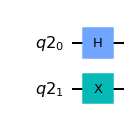

In [4]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
# The reason why we start from qr[0] for the first qubit is that python indexing starts from 0 and goes upwards
qc.h(qr[0]) # Applying hadamard gate to the first qubit
qc.x(qr[1]) # Applying X-gate (NOT gate) to the second qubit
qc.draw("mpl")

### Use multi-qubit gates

Multi-qubit gates work differently from single-qubit gates. The multi-qubit gates are often gates that could have an effect on other qubits due to the state of certain qubits. There often leverage a control qubit and a target qubit. The state of the target qubit is determined based on the control qubit's state. This ability of the control qubit to determine the state of the target qubit is referred to as entanglement. Examples of multi-qubit gates are: CNOT gate, CZ gate, CCNOT gate et al. You can learn more about multi-qubit gates **[here](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html)**.

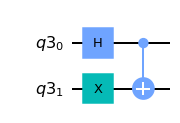

In [5]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.h(qr[0]) # Applying hadamard gate to the first qubit
qc.x(qr[1]) # Applying X-gate (NOT gate) to the second qubit
qc.cx(qr[0], qr[1]) # Applying the C-NOT gate to qubit 0 and qubit 1
qc.draw("mpl")

### Use barrier operations

The purpose of using barrier operations is to split a quantum circuit into multiple sections that clearly show how the qubits within the quantum circuit evolves. It can be also used as way to show the step-by-step evolution of an algorithm. More information about barriers can be found **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#barrier)**.

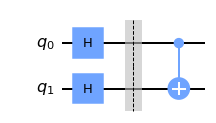

In [6]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.barrier() # Applying a barrier to all qubits
qc.cx(0,1)
qc.draw("mpl")

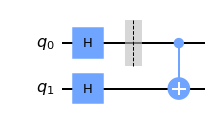

In [7]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.barrier(0) # Applying a barrier to first qubit
qc.cx(0,1)
qc.draw("mpl")

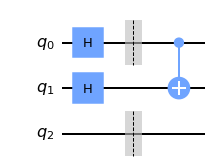

In [8]:
qc = QuantumCircuit(3)
qc.h([0,1])
qc.barrier([0,2]) # Applying a barrier to first and third qubits
qc.cx(0,1)
qc.draw("mpl")

### Return the circuit depth

To get information about what the depth of a circuit means, you can go use this [link](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#depth). Below is the code used to obtain the depth of a quantum circuit.

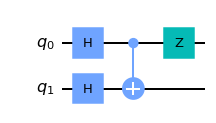

In [9]:
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0,1)
qc.z(0)
qc.draw("mpl")

In [10]:
qc.depth()
# As you can see the circuit above has a depth of 3.

3

### Extend quantum circuits

This sub-section focuses heavily on how to add a quantum circuit to another quantum circuit

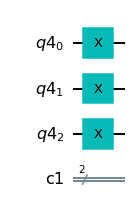

In [11]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.x([qr[0], qr[1], qr[2]])
qc.draw("mpl")

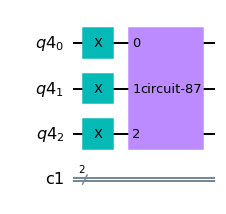

In [12]:
new_qc = QuantumCircuit(3)
new_qc.cx(1,2)
qc.append(new_qc, [qr[0], qr[1], qr[2]])
qc.draw("mpl")

### Return the OpenQASM string for a circuit

Below are two approaches for returning the OpenQASM string for a quantum circuit. To learn more about OpenQASM, use this **[link](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#qasm)**

In [13]:
qc.qasm(formatted = True)

OPENQASM 2.0;
include "qelib1.inc";
gate circuit_87 q0,q1,q2 { cx q1,q2; }
qreg q4[3];
creg c1[2];
x q4[0];
x q4[1];
x q4[2];
circuit_87 q4[0],q4[1],q4[2];



In [14]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
gate circuit_87 q0,q1,q2 { cx q1,q2; }
qreg q4[3];
creg c1[2];
x q4[0];
x q4[1];
x q4[2];
circuit_87 q4[0],q4[1],q4[2];



## Section 2 - Executing Experiments

### Execute a quantum circuit

There are two approaches for executing a quantum circuit

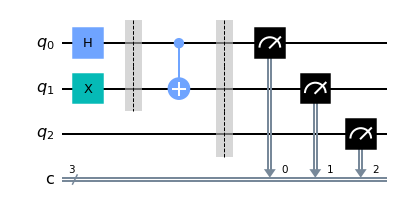

In [15]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(1)
qc.barrier(0,1)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw("mpl")

**Approach 1**: The first approach is a more common approach

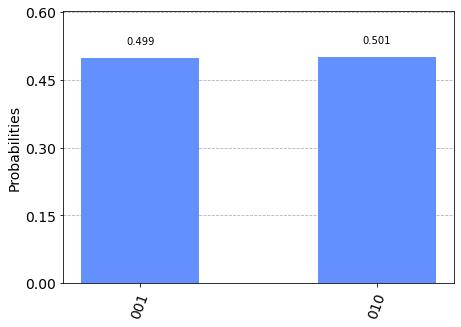

In [16]:
backend = BasicAer.get_backend("qasm_simulator")
result = execute(qc, backend, shots = 1024).result().get_counts() ## execute is used to run a quantum circuit
plot_histogram(result)

**Approach 2:** The second approach

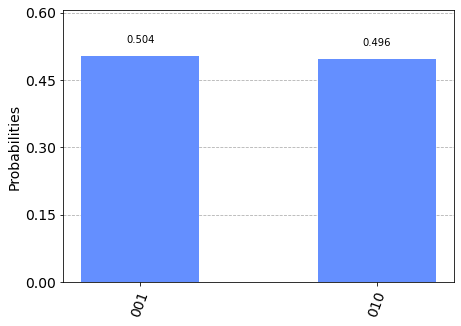

In [17]:
from qiskit import assemble
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

## Section 3 - Implement BasicAer: Python-based simulators

### Use the available simulators

In [18]:
BasicAer.backends() ## listing out all the BasicAer() backends

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [19]:
qasm_backend = BasicAer.get_backend("qasm_simulator") ## Used to obtain a qasm_simulator
sv_backend = BasicAer.get_backend("statevector_simulator") ## Used to obtain a statevector_simulator
unitary_backend = BasicAer.get_backend("unitary_simulator") ## Used to obtain a unitary_simulator

## Section 4 - Implement QASM

QASM is a quantum computing programming language, more formally called OpenQASM. It’s a quantum computing language specific to building quantum circuits. It allows the design of universal quantum computing using models and measurements. You can learn more about QASM **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#qasm)**

### Read a QASM file and string

In [20]:
## Writing a qasm string from scratch
qasm = '''OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
x q[0];
measure q -> c;'''
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
x q[0];
measure q -> c;


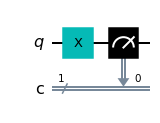

In [21]:
ex_qc = QuantumCircuit.from_qasm_str(qasm) # QuantumCircuit.from_qasm_str is used to read a qasm string
ex_qc.draw("mpl")

In [22]:
qc.qasm(formatted = True, filename = "quantum-circuit.qasm") # storing a qasm code as a file

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
x q[1];
barrier q[0],q[1];
cx q[0],q[1];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [23]:
qasm_str = qc.qasm()

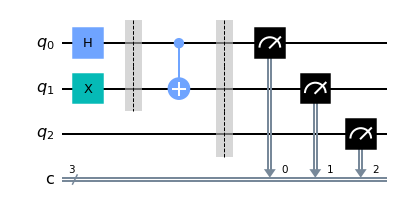

In [24]:
qasm_from_str = QuantumCircuit.from_qasm_str(qasm_str)
qasm_from_str.draw("mpl")

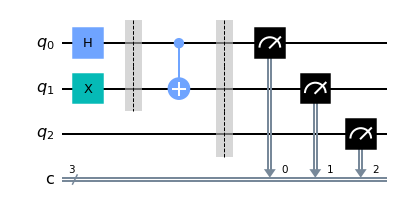

In [25]:
qasm_from_file = QuantumCircuit.from_qasm_file("quantum-circuit.qasm")
qasm_from_file.draw("mpl")

### Section 5 - Compare and Contrast Quantum Information

### Use classical and quantum registers

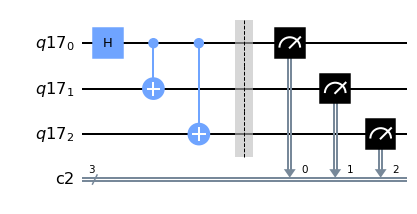

In [26]:
qr = QuantumRegister(3) # The QuantumRegister command is used to instantatiate the number of qubits
cr = ClassicalRegister(3) # The ClassicalRegister command is used to instantiate the number of classical bits
qc = QuantumCircuit(qr, cr) # Creating a QuantumCircuit by passing qr and cr respectively 
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.cx(qr[0],qr[2])
qc.barrier(qr)
qc.measure(qr, cr)
qc.draw("mpl")

### Use operators

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators. More information about operators can be found **[here](https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html)**. Please go through this link to learn more about operators.

In [27]:
from qiskit.quantum_info import Operator

In [28]:
# Creating an XX operator which is a combination of two qubits with each having an X gate
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]) 
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [29]:
input_dim, output_dim = XX.dim
input_dim, output_dim

(4, 4)

In [30]:
# Create an Operator from a Pauli object
from qiskit.quantum_info.operators import Pauli
pauliXX = Pauli(label='XX')
Operator(pauliXX)

C:\Users\ganiy\AppData\Local\Temp\ipykernel_34960\2284006734.py:3: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  pauliXX = Pauli(label='XX')


Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [31]:
from qiskit.extensions import RXGate, XGate, CXGate # obtaing gate operations directly
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [32]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
v = Operator(qc) ## converting a quantum circuit into an operator
input_dim, output_dim = v.dim
input_dim, output_dim

(4, 4)

In [33]:
array_to_latex(v)

<IPython.core.display.Latex object>

### Measure Fidelity

Quantum fidelity allows you to obtain a measurement of the amount of distance between two quantum gates, states, or processes. To learn more about fidelity, click **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#fidelity)**.

#### Process Fidelity

A formal definition states that quantum fidelity is a measure of how “close” two quantum states are, in that one state will effectively identify as another. Process Fidelity measures the noise within a quantum channel or operator. In process fidelity if two unitaries differ by a global state, they are still regarded as being similar. Use this **[link](https://qiskit.org/documentation/stubs/qiskit.quantum_info.process_fidelity.html)** to learn more about average gate fidelity.

In [34]:
# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

from qiskit.quantum_info import process_fidelity
# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


#### Average gate Fidelity

Average gate fidelity measures the fidelity of multiple gates within a quantum channel. Note, average gate fidelity requires the channel and target operator to have the same dimensions and input/output dimensions. Use this **[link](https://qiskit.org/documentation/stubs/qiskit.quantum_info.average_gate_fidelity.html)** to learn more about average gate fidelity.

In [35]:
from qiskit.quantum_info import average_gate_fidelity

In [36]:
average_gate_fidelity(op_a, op_b)

1.0

In [37]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
print("Process Fidelity is: ", process_fidelity(A, B))
print("Average Gate Fidelity is: ", average_gate_fidelity(A, B))

Process Fidelity is:  0.0
Average Gate Fidelity is:  0.3333333333333333


C:\Users\ganiy\AppData\Local\Temp\ipykernel_34960\3265610367.py:1: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  A = Operator(Pauli(label='X'))
C:\Users\ganiy\AppData\Local\Temp\ipykernel_34960\3265610367.py:2: DeprecationWarning: The 'label' keyword argument of 'Pauli' is deprecated as of Qiskit Terra 0.17 and will be removed in version 0.23 or later. Pass the label positionally instead, such as 'Pauli("XYZ")'.
  B = Operator(Pauli(label='Z'))


#### State Fidelity

State fidelity measures between two quantum states (such as statevectors or density matrix objects). Use this **[link](https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html)** to learn more about state fidelity.

In [38]:
backend = BasicAer.get_backend("statevector_simulator")

In [39]:
from qiskit.quantum_info import state_fidelity

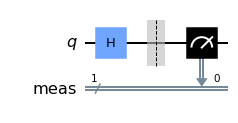

In [40]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

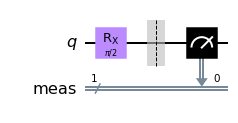

In [41]:
qc2 = QuantumCircuit(1)
qc2.rx(np.pi/2, 0)
qc2.measure_all()
qc2.draw("mpl")

In [42]:
result1 = execute(qc, backend).result().get_statevector()
result2 = execute(qc2, backend).result().get_statevector()

In [43]:
state_fidelity(result1, result2)

0.0

## Section 6 - Return Experiment Results

### Return and understand the histogram data of an experiment

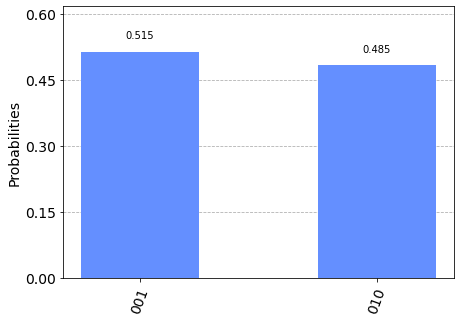

In [44]:
# In order to be able to plot the histogram data of an experiement, the qubits will have to be initially measured by collapsing
# them into a classical state.
# Moreover, the qasm_simulator is used to generate multiple outcomes from the experiment, so as to obtain the likeliest outcome
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(1)
qc.barrier(0,1)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qasm_backend = BasicAer.get_backend("qasm_simulator")
counts = execute(qc, qasm_backend, shots = 1024).result().get_counts()
plot_histogram(counts)

### Return and understand the statevector of an experiment

You can learn more about statevectors **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#init-state-vectors)** and **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#load-state-vector)**.

In [45]:
# To extract the statevector of a circuit, the qubits cannot be measured prior to extracting it.
# Moreover, the statevector_simulator is used to obtain the possible states of the quantum circuit and their amplitudes
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(1)
qc.barrier(0,1)
qc.cx(0,1)
qc.barrier()
sv_backend = BasicAer.get_backend("statevector_simulator")
sv = execute(qc, sv_backend).result().get_statevector()
array_to_latex(sv)

<IPython.core.display.Latex object>

### Return and understand the unitary of an experiment

More information about the unitary matrix can be found **[here](http://www.primaryobjects.com/2021/09/15/the-ultimate-guide-to-a-quantum-computing-certification-with-qiskit/#unitary)**.

In [46]:
# To extract the unitary matrix of a circuit, the qubits cannot be measured prior to extracting it.
# Moreover, the unitary_simulator is used to obtain the unitary matrix of a qubit
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(1)
qc.barrier(0,1)
qc.cx(0,1)
qc.barrier()
unitary_backend = BasicAer.get_backend("unitary_simulator")
unitary = execute(qc, unitary_backend).result().get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

## Section 7 - Use Qiskit Tools

For this section, we shall need to use an actual backend provided by IBM. You will need to insert your IBMQ account token in the code cell below. Go ahead and uncomment the code, and insert your token.

In [47]:
##IBMQ.save_account("INSERT-TOKEN-HERE")

In [48]:
providers = IBMQ.load_account()

In [49]:
## Figuring out which backend is the least busiest in order to save time for our experiment
from qiskit.providers.ibmq import least_busy
backend_less_busy = least_busy(providers.backends(filters= lambda x: x.configuration().n_qubits >= 5
                                       and not x.configuration().simulator
                                       and x.status().operational == True))
print("Backend: ", backend_less_busy)

Backend:  ibm_nairobi


### Monitor the status of a job instance

#### Approach 1

In [50]:
%qiskit_job_watcher # used to activate the job watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [51]:
# Uncomment the codes in the following cell and open up the toggle bar on the top-left corner to see the changes.

In [52]:
#qc = QuantumCircuit(3,3)
#qc.h(0)
#qc.x(1)
#qc.barrier(0,1)
#qc.cx(0,1)
#qc.barrier()
#qc.measure([0,1,2],[0,1,2])
#backend = providers.get_backend(str(backend_less_busy))
#result = execute(qc, backend)
#plot_histogram(result.result().get_counts())

In [53]:
%qiskit_disable_job_watcher # used to deacitivate the job watcher

#### Approach 2

In [54]:
# Uncomment the codes in the following cells to see the outcome

In [55]:
#qc = QuantumCircuit(3,3)
#qc.h(0)
#qc.x(1)
#qc.barrier(0,1)
#qc.cx(0,1)
#qc.barrier()
#qc.measure([0,1,2],[0,1,2])
#backend = providers.get_backend(str(backend_less_busy))
#result = execute(qc, backend)

In [56]:
#result.status()

In [57]:
# result.job_id()

## Section 8 - Display and Use system Informatoion

### Perform operations around the qiskit version

In [58]:
from qiskit import qiskit

In [59]:
qiskit.__version__

'0.21.0'

In [60]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [61]:
import qiskit.tools.jupyter
%qiskit_version_table # tabular format of Qiskit version information

In [62]:
# lists all available backends
%qiskit_backend_overview 

In [63]:
# loads a Qiskit job watcher
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [64]:
# disables a Qiskit job watcher
%qiskit_disable_job_watcher

In [65]:
# shows a Qiskit progress bar
%qiskit_progress_bar

### Use information gained from %qiskit_backend_overview

In [66]:
# one can use the information provided by this command to compare different backends' properties
# before selecting which one to choose. 
# Properties that could be scrutinized are number of qubits, pending jobs or whether a backend is the least busiest or not.
%qiskit_backend_overview

## Section 9 - Construct Visualizations

### Draw a circuit

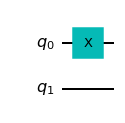

In [67]:
qc = QuantumCircuit(2)
qc.x(0)
qc.draw("mpl") # qc.draW() is used to draw a circuit

### Plot a histogram

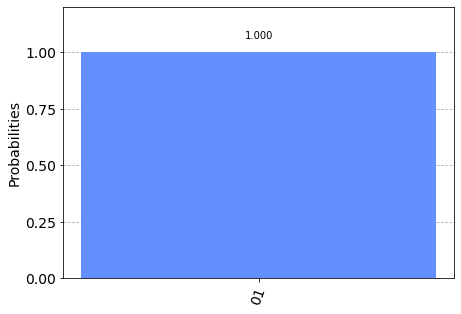

In [68]:
qc = QuantumCircuit(2)
qc.x(0)
qc.measure_all()
result = execute(qc, backend, shots = 1024).result().get_counts()
plot_histogram(result)

### Plot a bloch multivector/vector

In [69]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
backend = BasicAer.get_backend("statevector_simulator")
statevector = execute(qc, backend).result().get_statevector()

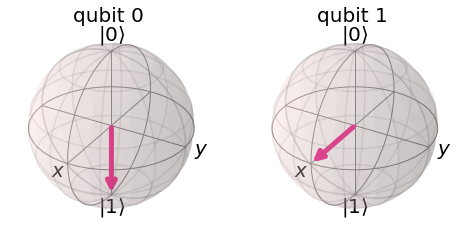

In [70]:
plot_bloch_multivector(statevector)

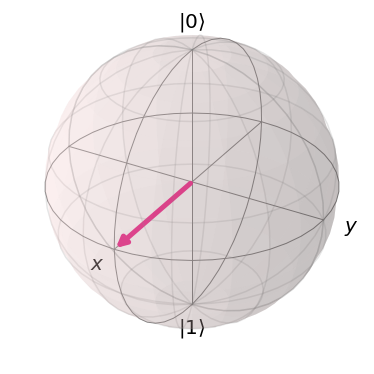

In [71]:
plot_bloch_vector([1,0,0])

### Plot a QSphere

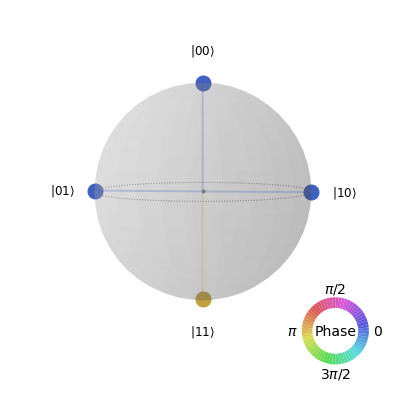

In [72]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.draw("mpl")
backend = BasicAer.get_backend("statevector_simulator")
statevector = execute(qc, backend).result().get_statevector()
plot_state_qsphere(statevector)

### Plot a density matrix

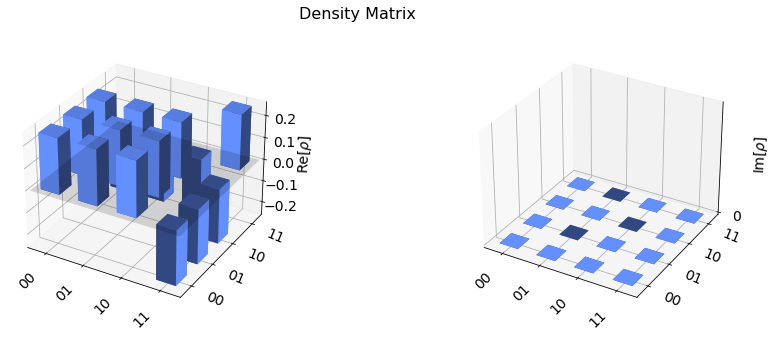

In [73]:
from qiskit.quantum_info import DensityMatrix
density = DensityMatrix.from_instruction(qc)
plot_state_city(density.data, title = "Density Matrix")

### Plot a gate map with error rates

In [74]:
from qiskit.visualization import plot_gate_map

In [75]:
backend_use = providers.get_backend("ibmq_belem")

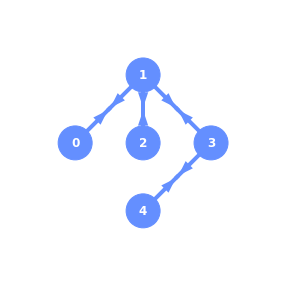

In [76]:
plot_gate_map(backend_use, plot_directed = True)

In [77]:
from qiskit.visualization import plot_error_map

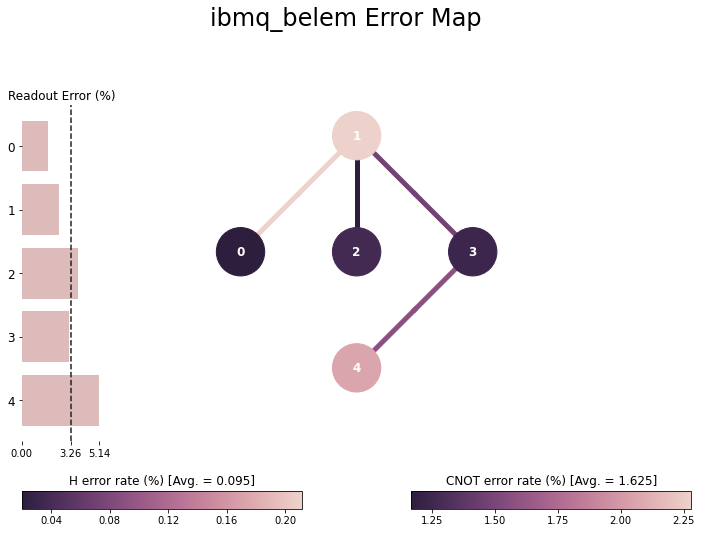

In [78]:
plot_error_map(backend_use)

## Section 10 - Access Aer Provider

Information about this section was covered in section 6. The only difference is that Aer is used to gain access to the backend insead of BasicAer.

In [79]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [80]:
qasm_backend = Aer.get_backend("qasm_simulator") ## Used to obtain a qasm_simulator
sv_backend = Aer.get_backend("statevector_simulator") ## Used to obtain a statevector_simulator
unitary_backend = Aer.get_backend("unitary_simulator") ## Used to obtain a unitary_simulator